In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. **Load and Preview The Data**

In [2]:
data_path = 'seoul-bike-rental-ai-pro-iti'
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))
train_df.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
print("Train Shape:", train_df.shape)
print("Test  Shape:", test_df.shape)

Train Shape: (5760, 15)
Test  Shape: (3000, 14)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5760 non-null   int64  
 1   Date                       5760 non-null   object 
 2   y                          5760 non-null   int64  
 3   Hour                       5760 non-null   int64  
 4   Temperature(�C)            5760 non-null   float64
 5   Humidity(%)                5760 non-null   int64  
 6   Wind speed (m/s)           5760 non-null   float64
 7   Visibility (10m)           5760 non-null   int64  
 8   Dew point temperature(�C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)    5760 non-null   float64
 10  Rainfall(mm)               5760 non-null   float64
 11  Snowfall (cm)              5760 non-null   float64
 12  Seasons                    5760 non-null   object 
 13  Holiday                    5760 non-null   objec

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         3000 non-null   int64  
 1   Date                       3000 non-null   object 
 2   Hour                       3000 non-null   int64  
 3   Temperature(�C)            3000 non-null   float64
 4   Humidity(%)                3000 non-null   int64  
 5   Wind speed (m/s)           3000 non-null   float64
 6   Visibility (10m)           3000 non-null   int64  
 7   Dew point temperature(�C)  3000 non-null   float64
 8   Solar Radiation (MJ/m2)    3000 non-null   float64
 9   Rainfall(mm)               3000 non-null   float64
 10  Snowfall (cm)              3000 non-null   float64
 11  Seasons                    3000 non-null   object 
 12  Holiday                    3000 non-null   object 
 13  Functioning Day            3000 non-null   objec

In [6]:
train_df.describe()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,1662.913107,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [7]:
test_df.describe()

,ID,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,7259.500000,11.500000,13.035300,57.966000,1.727933,1366.005333,4.103667,0.562940,0.174733,0.130300
std,866.169729,6.923341,12.026752,21.330288,1.013826,643.374688,13.170840,0.866555,1.223086,0.592634
min,5760.000000,0.000000,-17.800000,0.000000,0.000000,33.000000,-30.600000,0.000000,0.000000,0.000000
25%,6509.750000,5.750000,3.900000,40.000000,0.900000,779.000000,-3.900000,0.000000,0.000000,0.000000
50%,7259.500000,11.500000,13.950000,58.000000,1.500000,1591.500000,4.900000,0.010000,0.000000,0.000000
75%,8009.250000,17.250000,22.900000,76.000000,2.400000,2000.000000,15.600000,0.910000,0.000000,0.000000
max,8759.000000,23.000000,38.000000,98.000000,6.900000,2000.000000,26.800000,3.520000,29.500000,8.800000


# 2. **EDA**

In [8]:
visualization_df = train_df.drop(['ID'], axis=1)
visualization_df['Date'] = pd.to_datetime(visualization_df['Date'])
visualization_df = visualization_df.select_dtypes(exclude='object')
visualization_df['Week Days'] = visualization_df['Date'].apply(lambda x:x.dayofweek)
visualization_df['month']= visualization_df['Date'].apply(lambda x:x.month)
visualization_df.head()

,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Week Days,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1


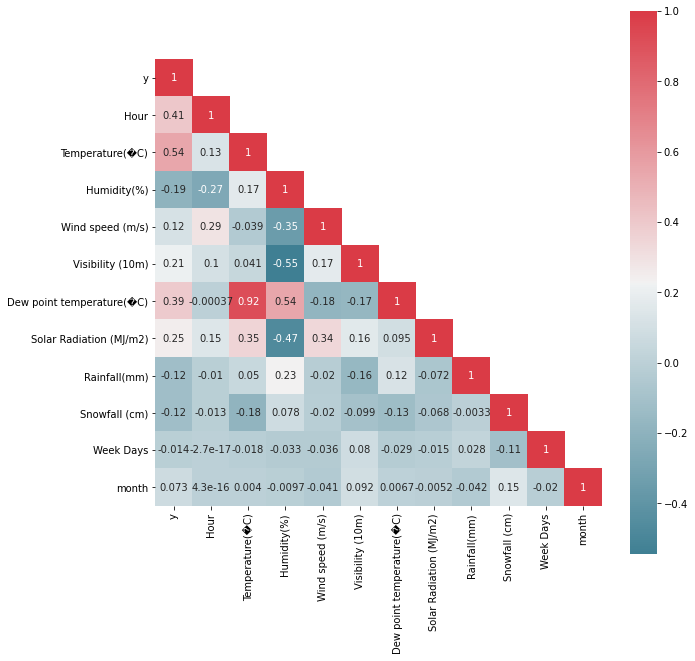

In [9]:
corr = visualization_df.corr()
corr_mask = np.ones_like(corr)
corr_mask[np.tril_indices_from(corr_mask)] = False

plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=corr_mask, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True)
plt.show()

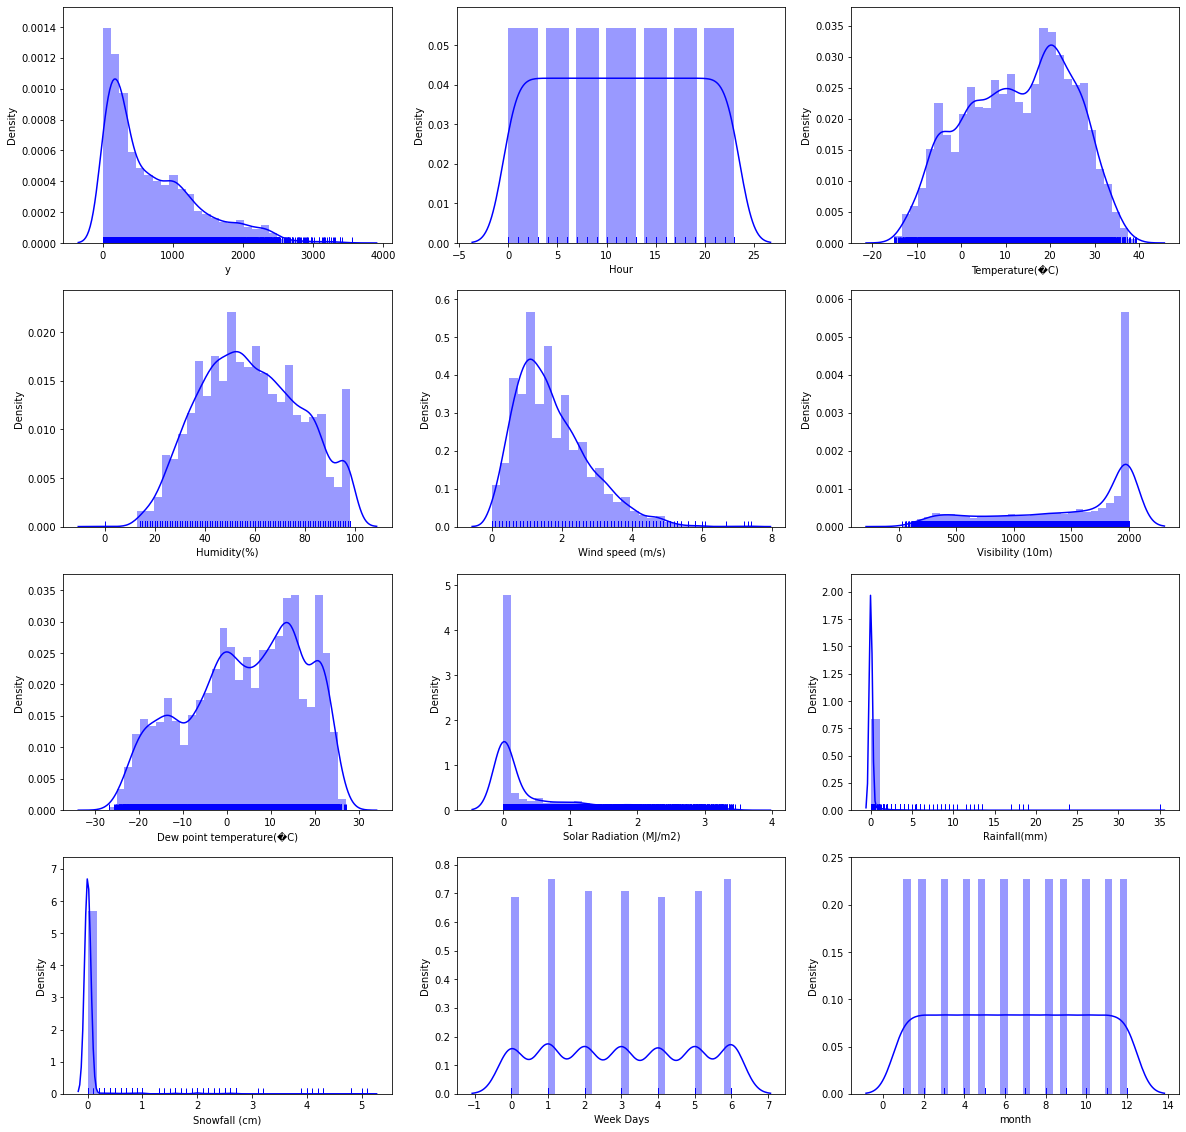

In [10]:
r = 4
c = 3
fig, axs = plt.subplots(r, c, figsize=(20, 20))

i = 0
j = 0
for column in visualization_df.drop(['Date'], axis=1).columns:
    sns.distplot(visualization_df[column], rug=True, bins=30, kde=True, hist=True, color='b', ax=axs[i, j])
    if(j == c-1):
        j = 0
        i += 1
    else:
        j += 1

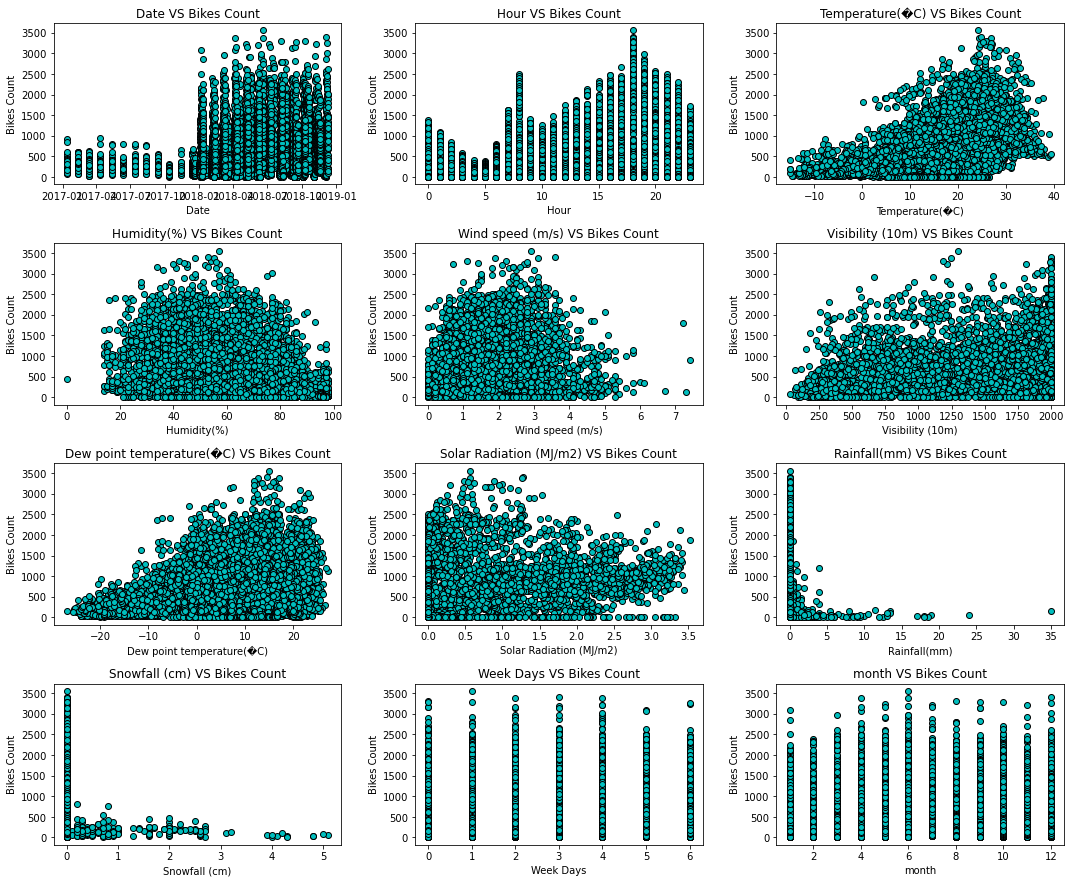

In [11]:
i = 1
plt.figure(figsize = [15, 15], tight_layout = 5)
for column in visualization_df.drop(['y'], axis=1).columns:
    plt.subplot(5, 3, i)
    plt.scatter(data = visualization_df, x = column, y = 'y', c='c', edgecolors='black')
    plt.xlabel(column)
    plt.ylabel('Bikes Count')
    plt.title(column + ' VS ' + 'Bikes Count')
    i += 1
plt.show()

y                               AxesSubplot(0.125,0.536818;0.110714x0.343182)
Hour                         AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Temperature(�C)              AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Humidity(%)                  AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Wind speed (m/s)             AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Visibility (10m)             AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Dew point temperature(�C)          AxesSubplot(0.125,0.125;0.110714x0.343182)
Solar Radiation (MJ/m2)         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rainfall(mm)                    AxesSubplot(0.390714,0.125;0.110714x0.343182)
Snowfall (cm)                   AxesSubplot(0.523571,0.125;0.110714x0.343182)
Week Days                       AxesSubplot(0.656429,0.125;0.110714x0.343182)
month                           AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

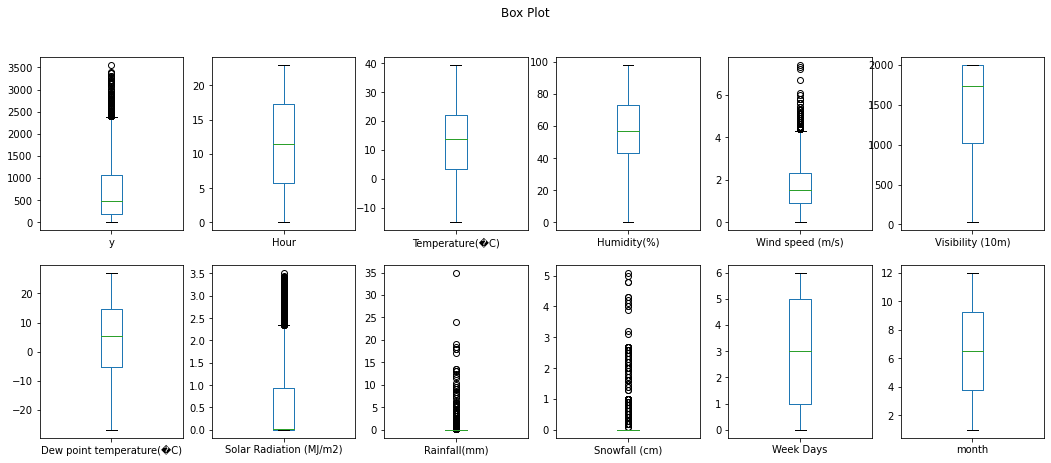

In [12]:
visualization_df.plot(kind='box', title='Box Plot', sharex=False, sharey=False, figsize=(18,7), subplots=True, layout=(2, 6))

0        0
1        1
2        2
3        3
4        4
        ..
5755    19
5756    20
5757    21
5758    22
5759    23
Name: Hour, Length: 5760, dtype: int64


Text(0.5, 1.0, 'Week Days VS Bikes Count')

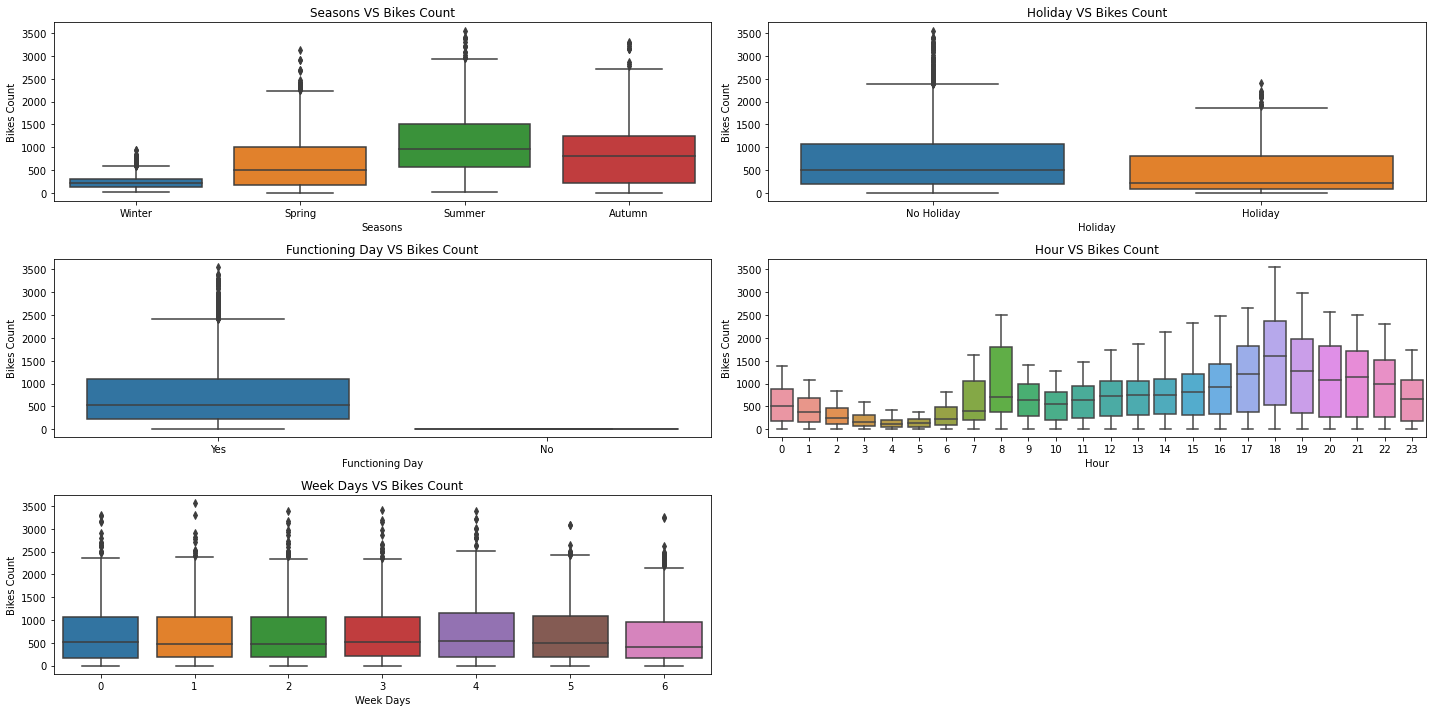

In [13]:
i = 1
print(train_df['Hour'])
plt.figure(figsize = [20, 10], tight_layout = 5)
for column in train_df[['Seasons', 'Holiday', 'Functioning Day', 'Hour']].columns:
    plt.subplot(3, 2, i)
    sns.boxplot(data=train_df, x=column, y='y')
    plt.xlabel(column)
    plt.ylabel('Bikes Count')
    plt.title(column + ' VS ' + 'Bikes Count')
    i += 1

plt.subplot(3, 2, i)
sns.boxplot(data=visualization_df, x='Week Days', y='y')
plt.xlabel('Week Days')
plt.ylabel('Bikes Count')
plt.title('Week Days VS ' + 'Bikes Count')

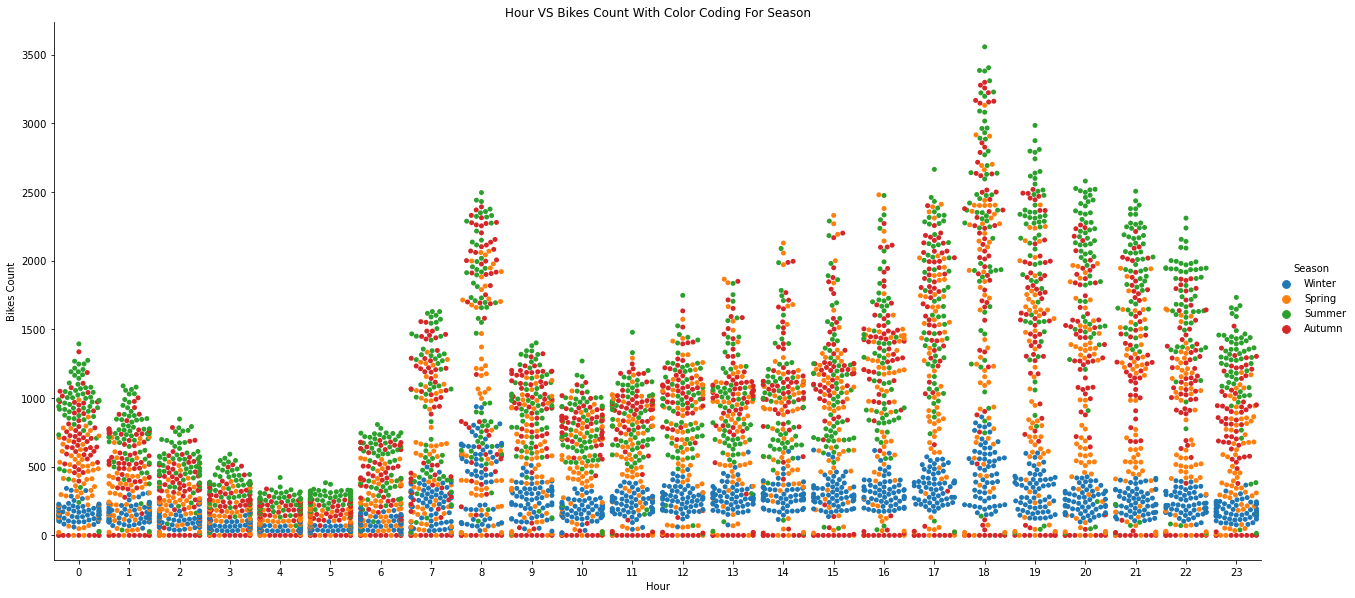

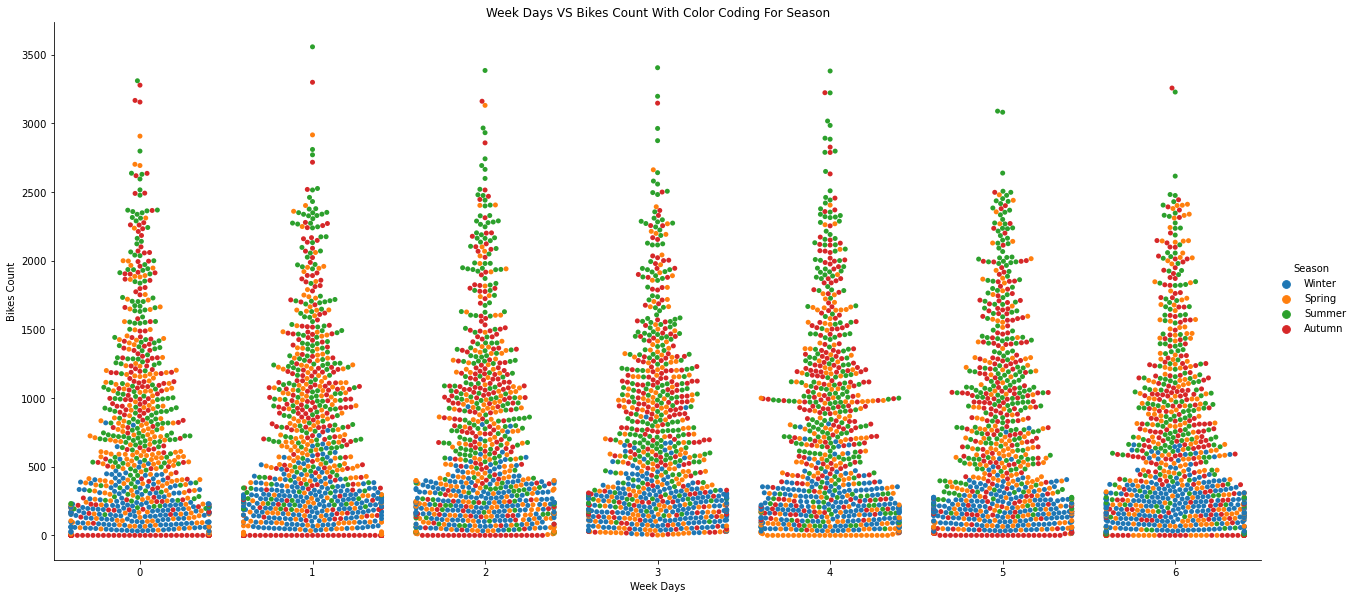

In [14]:
visualization_df['Season'] = train_df['Seasons']
for column in visualization_df[['Hour', 'Week Days']].columns:    
    sns.catplot(data=visualization_df, x=column, y='y', hue='Season', kind='swarm', height=8, aspect=2.2)
    plt.xlabel(column)
    plt.ylabel('Bikes Count')
    plt.title(column + ' VS ' + 'Bikes Count With Color Coding For Season')

# 3. **Feature Engineering**

In [15]:
train_df['Date']=pd.to_datetime(train_df['Date'],dayfirst=True).dt.date
test_df['Date']=pd.to_datetime(test_df['Date'],dayfirst=True).dt.date

In [16]:
def map_2_cols(df,col1,col2,group,gby):
    return df.loc[:,[col1, col2]].astype(str).sum(axis=1).map(group[gby])

In [17]:
def group_2_cols(df,col1,col2,gby,func='mean'):
    group = df[[col1, col2,gby]].groupby([col1, col2],as_index=False).agg('mean')
    group['comp'] = group[[col1,col2]].astype(str).sum(axis=1)
    group.set_index('comp',inplace = True)
    group.drop([col1, col2],axis=1,inplace = True)
    return group

In [18]:
def cyclical(df, column, max_value):
    """
    The function is encoding time series cyclical features with sin and cos.
    Input: 
    ---------
    df - pandas DataFrame
    column - column name
    max_value - column max value
    Output: 
    -----------
    -same dataframe with _sin and _cos columns added
    """    
    df[column + '_sin'] = np.sin(2 * np.pi * df[column] / max_value)
    df[column + '_cos'] = np.cos(2 * np.pi * df[column] / max_value)
    return df

In [19]:
def shift_col(df, col_name, shift_num=1):
    df[f"{col_name}_shifted{shift_num}"]= df[col_name] - df[col_name].shift(shift_num)
    df[f"{col_name}_shifted{shift_num}"].fillna(method='bfill',inplace=True)
#     if shift_num == 1:
    df[f"{col_name}_shifted{shift_num}**"]= df[f"{col_name}_shifted{shift_num}"] * df[f"{col_name}_shifted{shift_num}"]
#     else:
#         df[f"{col_name}_shifted{shift_num}**"]= df[f"{col_name}_shifted{shift_num}"] ** df[f"{col_name}_shifted{shift_num}"]
    df[f"{col_name}_shifted{shift_num}**"].fillna(method='bfill',inplace=True)
    df[f"{col_name}_shifted{shift_num}**"].fillna(method='ffill',inplace=True)
    df[f"{col_name}_shifted{shift_num}**"].fillna(method='ffill',inplace=True)
    return df

In [20]:
def preprocess(df, seasons_Hour_3cut=None, seaons_mean=None,test_set=False):
    df['Holiday'].replace({"Holiday": 0, "No Holiday": 1}, inplace=True)
    df['Functioning Day'].replace({"Yes": 0, "No": 1}, inplace=True)
    df['Seasons'].replace({"Autumn": 2, "Spring": 3, "Summer": 1, "Winter": 4}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df['year']= df['Date'].apply(lambda x:1 if x.year == 2018 else 0)
    df['Hour_3cut']=pd.cut(df['Hour'],
                       bins=[-np.inf,7,18,np.inf],
                       labels=[1,2,3]).astype('int')
    dummies = pd.get_dummies(df, columns=['Hour', 'Seasons'], prefix=['col1', 'col2'])
#     print(dummies)
  
    # split the fractions
    df['snow_frac'] = df['Snowfall (cm)'].apply(lambda x: x - int(x))
    df['rain_frac'] = df['Rainfall(mm)'].apply(lambda x: x - int(x))
    df['solar_frac'] = df['Solar Radiation (MJ/m2)'].apply(lambda x: x - int(x))
    df['wind_frac'] = df['Wind speed (m/s)'].apply(lambda x: x - int(x))
#     df['wind_log'] = df['Wind speed (m/s)'].apply(lambda x: np.log(x+1))
    
    #create dates columns
    df['month']= df['Date'].apply(lambda x:x.month)
    df['Week Days'] = df['Date'].apply(lambda x:x.dayofweek+1)
    
    
    #shift columns -1
    df = shift_col(df, 'Temperature(�C)', -1)
    df = shift_col(df, 'Rainfall(mm)', -1)
    df = shift_col(df, 'Humidity(%)', -1)
    df = shift_col(df, 'Wind speed (m/s)', -1)
    
    #shift columns
    df = shift_col(df, 'Temperature(�C)')
    df = shift_col(df, 'Rainfall(mm)')
    df = shift_col(df, 'Humidity(%)')
    df = shift_col(df, 'Wind speed (m/s)')
    
    
    df = cyclical(df, "month", 12)
    df = cyclical(df, "Hour", 23)
#     df = pd.concat([df, dummies], axis=1)
#     print(type(df))
    
    return df.drop(["ID", 'Date', 'Temperature(�C)_shifted-1','Temperature(�C)_shifted1'],axis=1)

In [21]:
train_X  = preprocess(train_df)
test_X = preprocess(test_df, test_set=True)
train_X = train_X[train_X['Functioning Day'] == 0]

train_X.drop('Functioning Day', axis=1, inplace=True)
test_X.drop('Functioning Day', axis=1, inplace=True)

train_X['y'] = train_X['y'].apply(lambda y: np.log(y+1)) 

In [22]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5513 entries, 0 to 5759
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   y                             5513 non-null   float64
 1   Hour                          5513 non-null   int64  
 2   Temperature(�C)               5513 non-null   float64
 3   Humidity(%)                   5513 non-null   int64  
 4   Wind speed (m/s)              5513 non-null   float64
 5   Visibility (10m)              5513 non-null   int64  
 6   Dew point temperature(�C)     5513 non-null   float64
 7   Solar Radiation (MJ/m2)       5513 non-null   float64
 8   Rainfall(mm)                  5513 non-null   float64
 9   Snowfall (cm)                 5513 non-null   float64
 10  Seasons                       5513 non-null   int64  
 11  Holiday                       5513 non-null   int64  
 12  year                          5513 non-null   int64  
 13  Hou

In [23]:
test_X.isnull().sum()

Hour                            0
Temperature(�C)                 0
Humidity(%)                     0
Wind speed (m/s)                0
Visibility (10m)                0
Dew point temperature(�C)       0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                    0
Snowfall (cm)                   0
Seasons                         0
Holiday                         0
year                            0
Hour_3cut                       0
snow_frac                       0
rain_frac                       0
solar_frac                      0
wind_frac                       0
month                           0
Week Days                       0
Temperature(�C)_shifted-1**     0
Rainfall(mm)_shifted-1          1
Rainfall(mm)_shifted-1**        0
Humidity(%)_shifted-1           1
Humidity(%)_shifted-1**         0
Wind speed (m/s)_shifted-1      1
Wind speed (m/s)_shifted-1**    0
Temperature(�C)_shifted1**      0
Rainfall(mm)_shifted1           0
Rainfall(mm)_shifted1**         0
Humidity(%)_sh

In [24]:
train_X.head()

,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Rainfall(mm)_shifted1,Rainfall(mm)_shifted1**,Humidity(%)_shifted1,Humidity(%)_shifted1**,Wind speed (m/s)_shifted1,Wind speed (m/s)_shifted1**,month_sin,month_cos,Hour_sin,Hour_cos
0,5.541264,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-1.4,1.96,-2.449294e-16,1.0,0.000000,1.000000
1,5.323010,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-1.4,1.96,-2.449294e-16,1.0,0.269797,0.962917
2,5.159055,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.2,0.04,-2.449294e-16,1.0,0.519584,0.854419
3,4.682131,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,-0.1,0.01,-2.449294e-16,1.0,0.730836,0.682553
4,4.369448,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0.0,0.0,-4.0,16.0,1.4,1.96,-2.449294e-16,1.0,0.887885,0.460065


In [25]:
test_X.head()

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,Rainfall(mm)_shifted1,Rainfall(mm)_shifted1**,Humidity(%)_shifted1,Humidity(%)_shifted1**,Wind speed (m/s)_shifted1,Wind speed (m/s)_shifted1**,month_sin,month_cos,Hour_sin,Hour_cos
0,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,4,...,0.0,0.0,0.0,0.0,-0.4,0.16,-2.449294e-16,1.0,0.000000,1.000000
1,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,4,...,0.0,0.0,0.0,0.0,-0.4,0.16,-2.449294e-16,1.0,0.269797,0.962917
2,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,4,...,0.0,0.0,-2.0,4.0,-0.2,0.04,-2.449294e-16,1.0,0.519584,0.854419
3,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,4,...,0.0,0.0,1.0,1.0,-0.1,0.01,-2.449294e-16,1.0,0.730836,0.682553
4,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,4,...,0.0,0.0,2.0,4.0,-0.1,0.01,-2.449294e-16,1.0,0.887885,0.460065


 # 4. **Model Training**

In [26]:
X = train_X.drop(columns=['y'])
y = train_X['y']

In [27]:
len(X.columns)

37

In [28]:
test_X.columns

Index(['Hour', 'Temperature(�C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'year', 'Hour_3cut', 'snow_frac', 'rain_frac', 'solar_frac',
       'wind_frac', 'month', 'Week Days', 'Temperature(�C)_shifted-1**',
       'Rainfall(mm)_shifted-1', 'Rainfall(mm)_shifted-1**',
       'Humidity(%)_shifted-1', 'Humidity(%)_shifted-1**',
       'Wind speed (m/s)_shifted-1', 'Wind speed (m/s)_shifted-1**',
       'Temperature(�C)_shifted1**', 'Rainfall(mm)_shifted1',
       'Rainfall(mm)_shifted1**', 'Humidity(%)_shifted1',
       'Humidity(%)_shifted1**', 'Wind speed (m/s)_shifted1',
       'Wind speed (m/s)_shifted1**', 'month_sin', 'month_cos', 'Hour_sin',
       'Hour_cos'],
      dtype='object')

In [29]:
def rmse(y_hat, y):
    return np.mean((y - y_hat)**2)**0.5

In [30]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=1500)
qt.fit_transform(X)
X = pd.DataFrame(qt.fit_transform(X))
# test_X = pd.DataFrame(qt.transform(test_X))

In [31]:
import catboost as cb
from sklearn.model_selection import KFold


splits = 10
skf = KFold(n_splits=splits, shuffle=True, random_state=42)
# Creating an array of zeros for storing "out of fold" predictions
y_cbm = 0
oof_preds_m2 = np.zeros((X.shape[0],))
model_fi_m2 = 0
total_mean_rmse_m2 = 0

# # Generating folds and making training and prediction for each of 10 folds
# for num, (train_idx, valid_idx) in enumerate(skf.split(X)):
#     print(train_idx)
#     X_train = X.iloc[train_idx]
#     X_valid = X.iloc[valid_idx]
#     y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    

#     model2 = cb.CatBoostRegressor(learning_rate=0.09, iterations=5000,max_depth=4, 
#                                   verbose=False, loss_function='MAE',
#                                   bootstrap_type='MVS', use_best_model=True, eval_metric="MAE",)
# #     model2 = xgb.XGBRegressor(**params)
#     model2.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])
    
#     # Getting mean test data predictions (i.e. devided by number of splits)
#     y_cbm += model2.predict(test_X) / splits
    
#     # Getting mean feature importances (i.e. devided by number of splits)
#     model_fi_m2 += model2.feature_importances_ / splits
    
#     # Getting validation data predictions. Each fold model makes predictions on an unseen data.
#     # So in the end it will be completely filled with unseen data predictions.
#     # It will be used to evaluate hyperparameters performance only.
#     oof_preds_m2[valid_idx] = model2.predict(X_valid)
    
#     # Getting score for a fold model
#     fold_rmse_m2 = rmse(y_valid, oof_preds_m2[valid_idx])
#     print(f"Fold {num} RMSE: {fold_rmse_m2}")

#     # Getting mean score of all fold models (i.e. devided by number of splits)
#     total_mean_rmse_m2 += fold_rmse_m2 / splits
    
    
# print(f"\nOverall RMSE: {total_mean_rmse_m2}")


In [32]:
first_fold = list(skf.split(X))[0]

train_idx = first_fold[0]
valid_idx = first_fold[1]

In [33]:
X_train = X.iloc[train_idx]
X_valid = X.iloc[valid_idx]
y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

In [35]:
cb_model = cb.CatBoostRegressor(learning_rate=0.09, iterations=5000,max_depth=4, 
                              verbose=False, loss_function='MAE',
                              bootstrap_type='MVS', use_best_model=True, eval_metric="MAE",)
#     model2 = xgb.XGBRegressor(**params)
cb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])

In [36]:
import pickle
pickle.dump(qt, open('qt.pkl', 'wb'))

In [38]:
y_cbm = cb_model.predict(qt.transform(test_X))

In [39]:
y_hat = np.exp(y_cbm) - 1

In [40]:
cb_model.save_model('cb_model', format='cbm')

In [41]:
y_hat

array([147.92543651, 157.40006638,  97.05324763, ..., 714.67350704,
       683.08989464, 234.85487924])

# 6. **Model Submission**

In [42]:
zero_days_id = test_df[test_df['Functioning Day'] == 1]['ID'].values
zero_days_id

array([8184, 8185, 8186, 8187, 8188, 8189, 8190, 8191, 8192, 8193, 8194,
       8195, 8196, 8197, 8198, 8199, 8200, 8201, 8202, 8203, 8204, 8205,
       8206, 8207, 8232, 8233, 8234, 8235, 8236, 8237, 8238, 8239, 8240,
       8241, 8242, 8243, 8244, 8245, 8246, 8247, 8248, 8249, 8250, 8251,
       8252, 8253, 8254, 8255])

In [43]:
sample_submission= pd.DataFrame({'ID':test_df['ID'].to_numpy(), 'y': y_hat })
sample_submission['y'] = sample_submission.apply(lambda row: 0 if row.ID in zero_days_id else row.y, axis=1)
sample_submission.to_csv(os.path.join('./seoul-bike-rental-ai-pro-iti',"submission.csv"), index=False)

In [44]:
sample_submission[sample_submission['ID']==8232]

,ID,y
2472,8232,0.0


(array([1110.,  538.,  500.,  363.,  192.,  151.,   93.,   28.,   18.,
           7.]),
 array([   0.        ,  326.59529196,  653.19058391,  979.78587587,
        1306.38116783, 1632.97645978, 1959.57175174, 2286.1670437 ,
        2612.76233565, 2939.35762761, 3265.95291957]),
 <BarContainer object of 10 artists>)

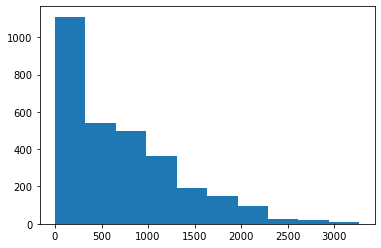

In [45]:
plt.hist(sample_submission['y'])